In [44]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
from pathlib import Path
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
import statistics

%matplotlib inline 
sns.set(color_codes=True)

In [45]:
# Load and display table
dir = Path("./data")
# df = pd.read_csv("./data/2019 - 01.csv", encoding = "ISO-8859-1")
df = (pd.read_csv(f, encoding = "ISO-8859-1") for f in dir.glob("*.csv"))
df = pd.concat(df)
df.head()
# display(df)

,month,trip_duration_sec,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender
0,January,80825,229.0,Foothill Blvd at 42nd Ave,196.0,Grand Ave at Perkins St,4861,Subscriber,1989.0,Male
1,January,65900,4.0,Cyril Magnin St at Ellis St,134.0,Valencia St at 24th St,5506,Subscriber,1989.0,Male
2,January,62633,245.0,Downtown Berkeley BART,157.0,65th St at Hollis St,2717,Customer,1965.0,Female
3,January,44680,85.0,Church St at Duboce Ave,53.0,Grove St at Divisadero,4557,Customer,1974.0,Male
4,January,60709,16.0,Steuart St at Market St,28.0,The Embarcadero at Bryant St,2100,Customer,NaN,NaN


In [55]:
#### Dropping irrelevant columns
# df.dtypes
# df = df.drop(["month"], axis = 1)
# df.head()
duplicate_rows_df = df[df.duplicated()]
# print("number of duplicate rows: ", duplicate_rows_df.shape)
df = df.drop_duplicates()
# df.head(5)

# removing null values
# print(df.isnull().sum())
# print("number of rows: ", df.count())
df = df.dropna()
# print("number of rows: ", df.count())
df.head(5)

,month,trip_duration_sec,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender
0,January,80825,229.0,Foothill Blvd at 42nd Ave,196.0,Grand Ave at Perkins St,4861,Subscriber,1989.0,Male
1,January,65900,4.0,Cyril Magnin St at Ellis St,134.0,Valencia St at 24th St,5506,Subscriber,1989.0,Male
2,January,62633,245.0,Downtown Berkeley BART,157.0,65th St at Hollis St,2717,Customer,1965.0,Female
3,January,44680,85.0,Church St at Duboce Ave,53.0,Grove St at Divisadero,4557,Customer,1974.0,Male
5,January,6733,245.0,Downtown Berkeley BART,266.0,Parker St at Fulton St,3532,Subscriber,1994.0,Male


In [47]:
#### Univariate analysis
# data = data.sort_values(by = )

### Detecting outliers with box and whiskers plot
The data should have outliers removed to a

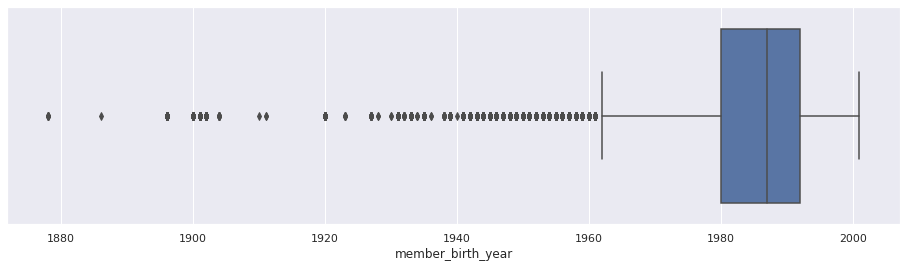

In [48]:
plt.figure(figsize = (16, 4))
outliers = sns.boxplot(x = df["member_birth_year"])

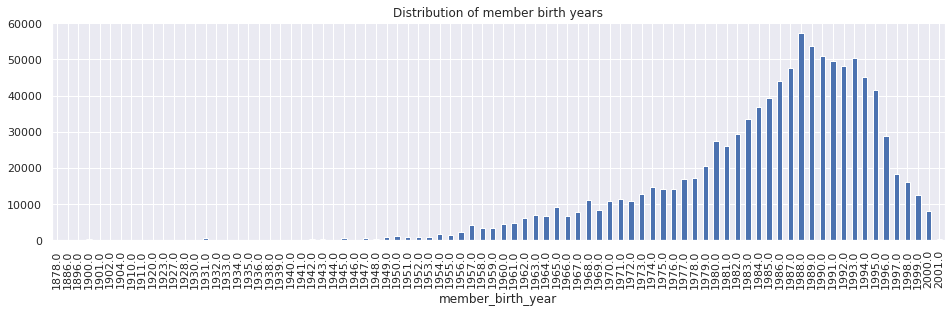

In [52]:
year_data = df.sort_values(by = "member_birth_year")
birthyear_chart = year_data.groupby("member_birth_year").size()
birthyear_chart.plot.bar(title = "Distribution of member birth years", figsize = (16, 4))

### User types ( subscriber or customer )

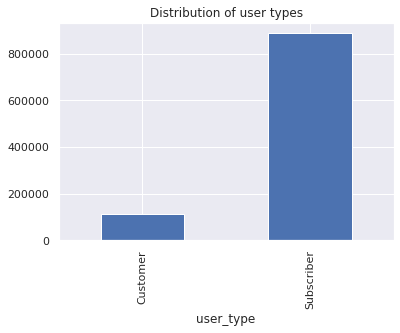

In [49]:
user_type = df.groupby("user_type").size()
user_type.plot.bar(title = "Distribution of user types")

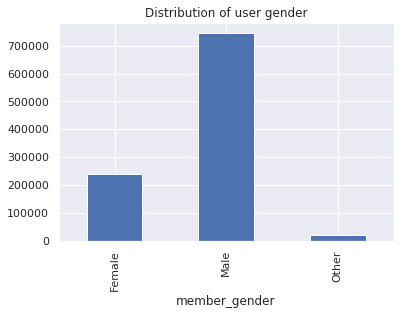

In [51]:
user_type = df.groupby("member_gender").size()
user_type.plot.bar(title = "Distribution of user gender")

### Which months are the busiest?

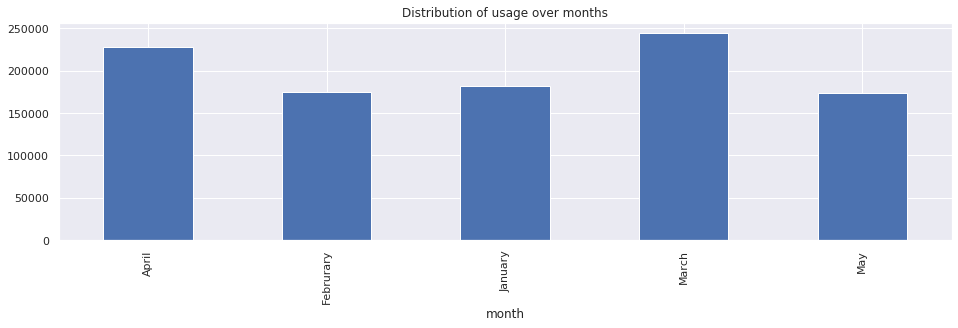

In [58]:
month_usage = df.groupby("month").size()
month_usage.plot.bar(title = "Distribution of usage over months", figsize = (16, 4))

### Baby boomers?

,trip_duration_sec,start_station_id,end_station_id,bike_id,member_birth_year
trip_duration_sec,1.000000,0.007694,0.023561,0.003788,-0.003010
start_station_id,0.007694,1.000000,0.328203,-0.007181,0.106566
end_station_id,0.023561,0.328203,1.000000,0.000091,0.105218
bike_id,0.003788,-0.007181,0.000091,1.000000,0.038442
member_birth_year,-0.003010,0.106566,0.105218,0.038442,1.000000


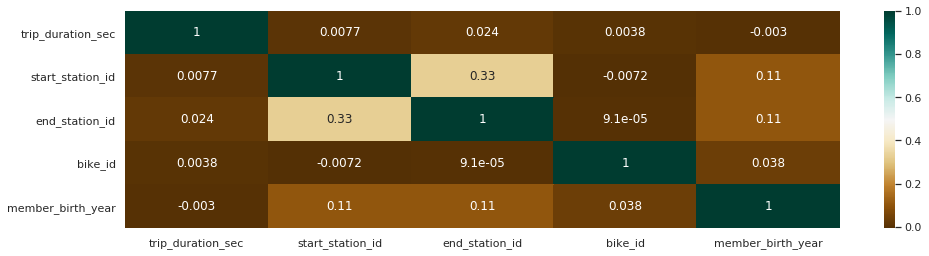

In [64]:
# What, why?

plt.figure(figsize = (16, 4))
c= df.corr()
sns.heatmap(c, cmap="BrBG", annot=True)
c